In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [3]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [5]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [6]:
df_test.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

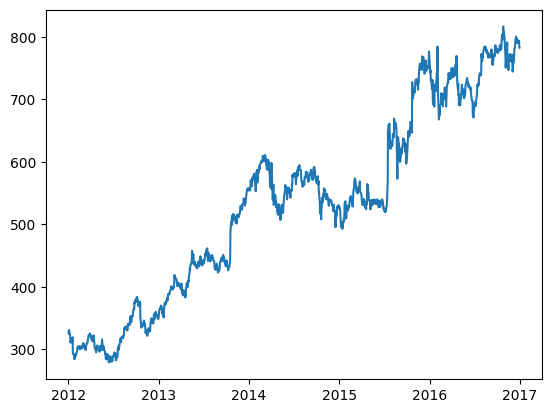

In [7]:
plt.plot(pd.to_datetime(df_train['Date']), df_train['Open'])

In [8]:
df_train["Volume"] = df_train["Volume"].str.replace(',', '').astype(float)
df_train.dtypes
X = df_train[['Open','High','Low','Volume']]

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
df_train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume    float64
dtype: object

In [11]:
X_scaled.shape

(1258, 4)

In [12]:
rows = []
y = []
for i in range(1198):
    rows.append(X_scaled[i:60+i])
    y.append(X_scaled[60+i,0])
X_final = np.array(rows)
y_final = np.array(y)

In [13]:
X_final.shape

(1198, 60, 4)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [16]:
model = Sequential()
model.add(LSTM(70, return_sequences = True, input_shape = (60,4)))
model.add(LSTM(70, return_sequences = True))
model.add(LSTM(70, return_sequences = True))
model.add(LSTM(70, return_sequences = False))
model.add(Dense(1))

model.compile(loss='mean_squared_error')

In [17]:
history = model.fit(X_final, y_final, batch_size=32, epochs=40)

Epoch 1/40
38/38 [==============================] - 13s 128ms/step - loss: 0.0353
Epoch 2/40
38/38 [==============================] - 4s 101ms/step - loss: 0.0119
Epoch 3/40
38/38 [==============================] - 3s 90ms/step - loss: 0.0066
Epoch 4/40
38/38 [==============================] - 3s 91ms/step - loss: 0.0086
Epoch 5/40
38/38 [==============================] - 3s 89ms/step - loss: 0.0068
Epoch 6/40
38/38 [==============================] - 4s 93ms/step - loss: 0.0056
Epoch 7/40
38/38 [==============================] - 3s 87ms/step - loss: 0.0053
Epoch 8/40
38/38 [==============================] - 3s 87ms/step - loss: 0.0047
Epoch 9/40
38/38 [==============================] - 3s 90ms/step - loss: 0.0043
Epoch 10/40
38/38 [==============================] - 3s 88ms/step - loss: 0.0042
Epoch 11/40
38/38 [==============================] - 3s 87ms/step - loss: 0.0035
Epoch 12/40
38/38 [==============================] - 3s 87ms/step - loss: 0.0033
Epoch 13/40
38/38 [===============

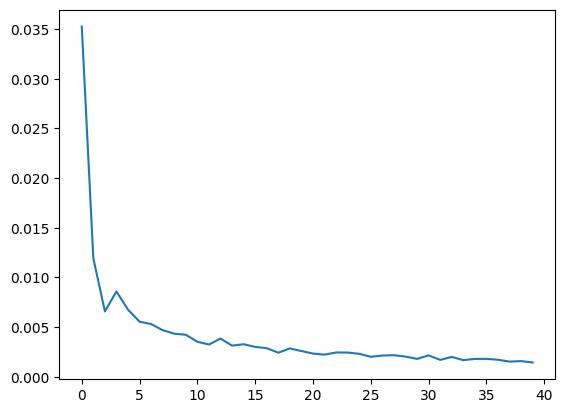

In [18]:
plt.plot(history.history['loss'])

In [19]:
df_test["Volume"] = df_test["Volume"].str.replace(',', '').astype(float)
df_test.dtypes
X_test = df_test[['Open','High','Low','Volume']]
X_test_scaled = scaler.transform(df_test[['Open','High','Low','Volume']])
X_test_scaled.shape

(20, 4)

In [20]:
X_test_temp = np.vstack([X_scaled[-60:], X_test_scaled])

In [21]:
rows = []
for i in range(20):
    rows.append(X_test_temp[i:60+i])
X_test_final = np.array(rows)

In [22]:
X_test_final.shape

(20, 60, 4)

In [23]:
yp = model.predict(X_test_final)
scaler.scale_

1/1 [==============================] - 2s 2s/step


array([1.86025746e-03, 1.86751825e-03, 1.89422640e-03, 4.00480577e-08])

In [24]:
inv = 1/1.86025746e-03
inv

537.5599998937781